In [1]:
import pandas as pd
import numpy as np

file_name = '../HashtagNetwork/allseason_20k_rawdata.json'


df = pd.read_json(file_name)

In [2]:
base_df = df[['id','hashtags']]

In [3]:
base_df.head()

id                                           hashtags
0  BtOm-dkHn5v  [sport, travelling, winterfashion, cestovani, ...
1  BtQp-IfHkzq  [instagood, instastyle, fashionblog, fashionbl...
2  BtRdH3UBQ6i  [london, like4like, corduroy, beanie, ootd, uk...
3  BtRJG92g_CG                                                 []
4  BtOpNQpApMI  [styleover50, chiberia, styleisforlife, thrift...

In [4]:
base_df.index = base_df['id']

In [5]:
base_df = base_df.drop(columns='id')

In [6]:
fashion_df = base_df[base_df.astype(str)['hashtags'] != '[]']

In [7]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17644 entries, BtOm-dkHn5v to BtCTPK7AJlC
Data columns (total 1 columns):
hashtags    17644 non-null object
dtypes: object(1)
memory usage: 275.7+ KB


In [8]:
def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

In [9]:
def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(
        0, index = np.arange(0,len(df)),columns=taglist)    
    
    for i in range(len(df)):
        list_of_row = list(df.iloc[i])[0]
        
        for tag in list_of_row:
            if tag in taglist:
                result_df[tag][i] = 1
        
    return result_df

In [10]:
tag_df = list(fashion_df['hashtags'])
for i in range(len(tag_df)):
    tag_df[i] = list(set(tag_df[i]))
    
fashion_df['hashtags'] = tag_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
fashion_dict = getTagsDict(fashion_df)

# Remove HF Tags

In [12]:
# 삭제할 태그 : fashion style ootd(outfitoftheday) shopping
# 처음 시도이기에 조금만 삭제해 봅니다.
for tag in fashion_dict:
    if tag[0] == 'fashion' or tag[0] == 'style' or tag[0] == 'ootd' or tag[0] == 'outfitoftheday' or tag[0] == 'shopping': 
        fashion_dict.remove(tag)

In [13]:
fashion_dict200 = fashion_dict[-500:]

In [14]:
fashion_dict200

[('lovefashion', 86),
 ('work', 86),
 ('bohofashion', 86),
 ('hunk', 86),
 ('jumpsuits', 86),
 ('winterbreak', 87),
 ('winterlook', 87),
 ('january', 87),
 ('polarvortex', 87),
 ('knitwear', 87),
 ('ltksalealert', 87),
 ('springdress', 87),
 ('summers', 87),
 ('season', 88),
 ('istanbul', 88),
 ('beautyblogger', 88),
 ('supportlocal', 88),
 ('cotton', 88),
 ('summerweather', 88),
 ('trendalert', 89),
 ('movies', 89),
 ('custom', 89),
 ('lebanon', 89),
 ('buyhandmade', 89),
 ('summerishere', 89),
 ('highheels', 90),
 ('amazing', 90),
 ('knit', 90),
 ('jumpsuit', 90),
 ('sneakers', 91),
 ('ethicalfashion', 91),
 ('nycfashion', 91),
 ('bags', 91),
 ('handmadejewellery', 91),
 ('womensboutique', 91),
 ('dior', 92),
 ('happiness', 92),
 ('mua', 92),
 ('sandals', 92),
 ('thriftstorefinds', 93),
 ('shoesaddict', 93),
 ('stylebook', 93),
 ('shopsmallbusiness', 93),
 ('春コーデ', 93),
 ('wintercollection', 94),
 ('londonfashion', 94),
 ('couture', 94),
 ('madewithlove', 94),
 ('springfashion2019', 

In [15]:
fashion_top200 = []
for i in fashion_dict200:
    fashion_top200.append(i[0])

In [16]:
before_corr200 = get_DataFrame_for_affinity(fashion_df,fashion_top200)

In [17]:
before_corr200

lovefashion  work  bohofashion  hunk  jumpsuits  winterbreak  \
0                0     0            0     0          0            0   
1                0     0            0     0          0            0   
2                0     0            0     0          0            0   
3                0     0            0     0          0            0   
4                0     0            0     0          0            0   
5                0     0            0     0          0            1   
6                0     0            0     0          0            0   
7                0     0            0     0          0            0   
8                0     0            0     0          0            0   
9                0     0            0     0          0            0   
10               0     0            0     0          0            0   
11               0     0            0     0          0            0   
12               0     0            0     0          0            0   
13               0     0            0     0          0            0   
14               0     0            0     0          0            0   
15               0     0            0     0          0            0   
16               0     0            0     0          0            0   
17               0     0            0     0          0            0   
18               0     0            0     0          0            0   
19               0     0            0     0          0            0   
20               0     0            0     0          0            0   
21               0     0            0     0          0            0   
22               1     0            0     0          0            0   
23               0     0            0     0          0            0   
24               0     0            0     0          0            0   
25               0     0            0     0          0            0   
26               0     0            0     0          0            1   
27               0     0            0     0          0            0   
28               0     0            0     0          0            0   
29               0     0            0     0          0            0   
...            ...   ...          ...   ...        ...          ...   
17614            0     0            0     0          0            0   
17615            0     0            0     0          0            0   
17616            0     0            0     0          0            0   
17617            0     0            0     0          0            0   
17618            0     0            0     0          0            0   
17619            0     0            0     0          0            0   
17620            0     0            0     0          0            0   
17621            0     0            0     0          0            0   
17622            0     0            0     0          0            0   
17623            0     0            0     0          0            0   
17624            0     0            0     0          0            0   
17625            0     0            0     0          0            0   
17626            0     0            0     0          0            0   
17627            0     0            0     0          0            0   
17628            0     0            0     0          0            0   
17629            0     0            0     0          0            0   
17630            0     0            0     0          0            0   
17631            0     0            0     0          0            0   
17632            0     0            0     0          0            0   
17633            0     0            0     0          0            0   
17634            0     0            0     0          0            0   
17635            0     0            0     0          0            0   
17636            0     0            0     0          0            0   
17637            0     0            0     0          0            0   
17638            0     0       

In [18]:
corr_affinity200 = before_corr200.corr(method = 'pearson')

In [19]:
corr_threshold200 = corr_affinity200.copy()

In [20]:
def addone_dividetwo(x):
    return pow((x+1)/2, 2)

In [21]:
corr_threshold200 = corr_threshold200.applymap(addone_dividetwo)

In [22]:
corr_threshold200

lovefashion      work  bohofashion      hunk  jumpsuits  \
lovefashion        1.000000  0.247557     0.247557  0.247557   0.247557   
work               0.247557  1.000000     0.247557  0.247557   0.247557   
bohofashion        0.247557  0.247557     1.000000  0.247557   0.247557   
hunk               0.247557  0.247557     0.247557  1.000000   0.247557   
jumpsuits          0.247557  0.247557     0.247557  0.247557   1.000000   
winterbreak        0.247543  0.247543     0.247543  0.247543   0.247543   
winterlook         0.247543  0.247543     0.247543  0.247543   0.247543   
january            0.247543  0.247543     0.247543  0.247543   0.247543   
polarvortex        0.247543  0.247543     0.247543  0.247543   0.247543   
knitwear           0.247543  0.247543     0.259238  0.247543   0.247543   
ltksalealert       0.253357  0.247543     0.247543  0.247543   0.247543   
springdress        0.247543  0.253357     0.247543  0.247543   0.247543   
summers            0.259238  0.247543     0.247543  0.247543   0.247543   
season             0.247529  0.247529     0.247529  0.247529   0.247529   
istanbul           0.247529  0.247529     0.247529  0.247529   0.247529   
beautyblogger      0.247529  0.247529     0.247529  0.247529   0.259157   
supportlocal       0.247529  0.247529     0.253309  0.247529   0.247529   
cotton             0.253309  0.247529     0.382936  0.247529   0.247529   
summerweather      0.247529  0.247529     0.247529  0.247529   0.247529   
trendalert         0.247515  0.247515     0.247515  0.247515   0.247515   
movies             0.247515  0.247515     0.247515  0.851072   0.247515   
custom             0.247515  0.247515     0.247515  0.247515   0.247515   
lebanon            0.247515  0.247515     0.247515  0.247515   0.247515   
buyhandmade        0.247515  0.247515     0.247515  0.247515   0.247515   
summerishere       0.247515  0.247515     0.247515  0.247515   0.247515   
highheels          0.253216  0.247501     0.247501  0.247501   0.247501   
amazing            0.253216  0.253216     0.247501  0.247501   0.247501   
knit               0.247501  0.247501     0.258997  0.247501   0.247501   
jumpsuit           0.247501  0.253216     0.247501  0.247501   0.253216   
sneakers           0.247487  0.247487     0.247487  0.247487   0.247487   
...                     ...       ...          ...       ...        ...   
styleinspo         0.245679  0.251242     0.247526  0.242005   0.243838   
fashionable        0.252961  0.241939     0.241939  0.241939   0.243759   
photography        0.247306  0.243675     0.247306  0.249131   0.241869   
fashiongram        0.245428  0.241828     0.241828  0.392773   0.254546   
fashionaddict      0.247224  0.241818     0.241818  0.241818   0.263798   
model              0.250685  0.252495     0.295929  0.245293   0.243509   
spring             0.251438  0.248014     0.246310  0.241236   0.242921   
boutique           0.242604  0.240964     0.244249  0.240964   0.261009   
trendy             0.240960  0.242599     0.242599  0.240960   0.299807   
onlineboutique     0.242555  0.240922     0.255816  0.240922   0.283399   
instastyle         0.250470  0.240753     0.255400  0.240753   0.260379   
sale               0.242306  0.250381     0.242306  0.240707   0.365422   
instagood          0.259992  0.246994     0.248600  0.242206   0.243796   
stylish            0.250853  0.244700     0.241653  0.241653   0.299430   
styleblogger       0.274389  0.244628     0.250751  0.241594   0.272780   
love               0.252286  0.252286     0.249206  0.243103   0.243103   
summer             0.261009  0.248817     0.257934  0.245814   0.275074   
fashionpost        0.248672  0.241252     0.244207  0.362536   0.292297   
streetstyle        0.255157  0.240755     0.266980  0.239337   0.239337   
onlineshopping     0.240592  0.239191     0.286043  0.239191   0.348805   
womensfashion      0.256058  0.281075     0.258941  0.352923   0.241887   
winter             0.253004  0.251587    

# Clustering

In [23]:
from sklearn.cluster import SpectralClustering

sc200 = SpectralClustering(n_clusters = 30, affinity='precomputed')

In [24]:
labels = sc200.fit_predict(corr_threshold200)

In [25]:
predict200 = pd.DataFrame(labels)

In [26]:
predict200.columns = ['Group']

In [27]:
predict200

Group
0        0
1       25
2       19
3       12
4        0
5        5
6        0
7        0
8        0
9        0
10       1
11      10
12       9
13      24
14       4
15       0
16       0
17      19
18       9
19       3
20      12
21      27
22      21
23      27
24       9
25       3
26      24
27       0
28       0
29       0
..     ...
470      7
471     20
472      8
473     20
474     20
475     19
476     24
477     13
478      6
479     13
480      7
481      6
482     23
483      6
484      7
485     23
486     22
487      6
488      7
489     13
490     13
491      8
492      7
493      7
494      7
495      7
496      0
497     19
498      0
499      8

[500 rows x 1 columns]

In [28]:
node_df200 = pd.DataFrame(fashion_dict200, columns= ['Tag','Freq'])

In [29]:
node_df200['Group'] = predict200

In [30]:
node_df200

Tag  Freq  Group
0       lovefashion    86      0
1              work    86     25
2       bohofashion    86     19
3              hunk    86     12
4         jumpsuits    86      0
5       winterbreak    87      5
6        winterlook    87      0
7           january    87      0
8       polarvortex    87      0
9          knitwear    87      0
10     ltksalealert    87      1
11      springdress    87     10
12          summers    87      9
13           season    88     24
14         istanbul    88      4
15    beautyblogger    88      0
16     supportlocal    88      0
17           cotton    88     19
18    summerweather    88      9
19       trendalert    89      3
20           movies    89     12
21           custom    89     27
22          lebanon    89     21
23      buyhandmade    89     27
24     summerishere    89      9
25        highheels    90      3
26          amazing    90     24
27             knit    90      0
28         jumpsuit    90      0
29         sneakers    91      0
..              ...   ...    ...
470      styleinspo   889      7
471     fashionable   903     20
472     photography   918      8
473     fashiongram   927     20
474   fashionaddict   929     20
475           model   948     19
476          spring  1059     24
477        boutique  1122     13
478          trendy  1123      6
479  onlineboutique  1132     13
480      instastyle  1172      7
481            sale  1183      6
482       instagood  1204     23
483         stylish  1323      6
484    styleblogger  1336      7
485            love  1337     23
486          summer  1392     22
487     fashionpost  1413      6
488     streetstyle  1529      7
489  onlineshopping  1568     13
490   womensfashion  1592     13
491          winter  1616      8
492     fashionista  2276      7
493    instafashion  2587      7
494  fashionblogger  3139      7
495           style  4389      7
496     fallfashion  4400      0
497   summerfashion  4822     19
498   springfashion  4845      0
499   winterfashion  6016      8

[500 rows x 3 columns]

In [31]:
node_df200 = node_df200.sort_values(['Group'],ascending=True)
groupby_tags200 = node_df200.groupby('Group')['Tag'].apply(list)


In [32]:
for list in groupby_tags200:
    print(list)
    print()

['lovefashion', 'styles', 'potd', 'fashionbloggers', 'white', 'crochet', 'likeforfollow', 'makeup', 'cozy', 'blue', 'wanderlust', 'chic', 'sweaterweather', 'inspiration', 'followforfollowback', 'streetphotography', 'summeroutfit', 'fashiongirl', 'musthave', 'casual', 'bag', 'plussizefashion', 'collection', 'california', 'shopmycloset', 'dailylook', 'stripes', 'shoes', 'red', 'pants', 'lifestyle', 'valentines', 'curvy', 'momstyle', 'newarrival', 'top', 'fashionforward', 'runway', 'necklace', 'shirt', 'clothingbrand', 'apparel', 'fashionlook', 'entrepreneur', 'autumnfashion', 'linkinbio', 'motivation', 'mode', 'luxurylifestyle', 'girlboss', 'winterwear', 'sunglasses', 'sweater', 'fashionkilla', 'womensclothing', 'weship', 'fashioninsta', 'springfashion', 'pink', 'momlife', 'slowfashion', 'newcollection', 'onlineshop', 'coat', 'jacket', 'spring2019', 'girls', 'instamood', 'ss19', 'likeforlikes', 'fashiontrends', 'jeans', 'instapic', 'mood', 'black', 'instalove', 'supportsmallbusiness', 'b

# Draw

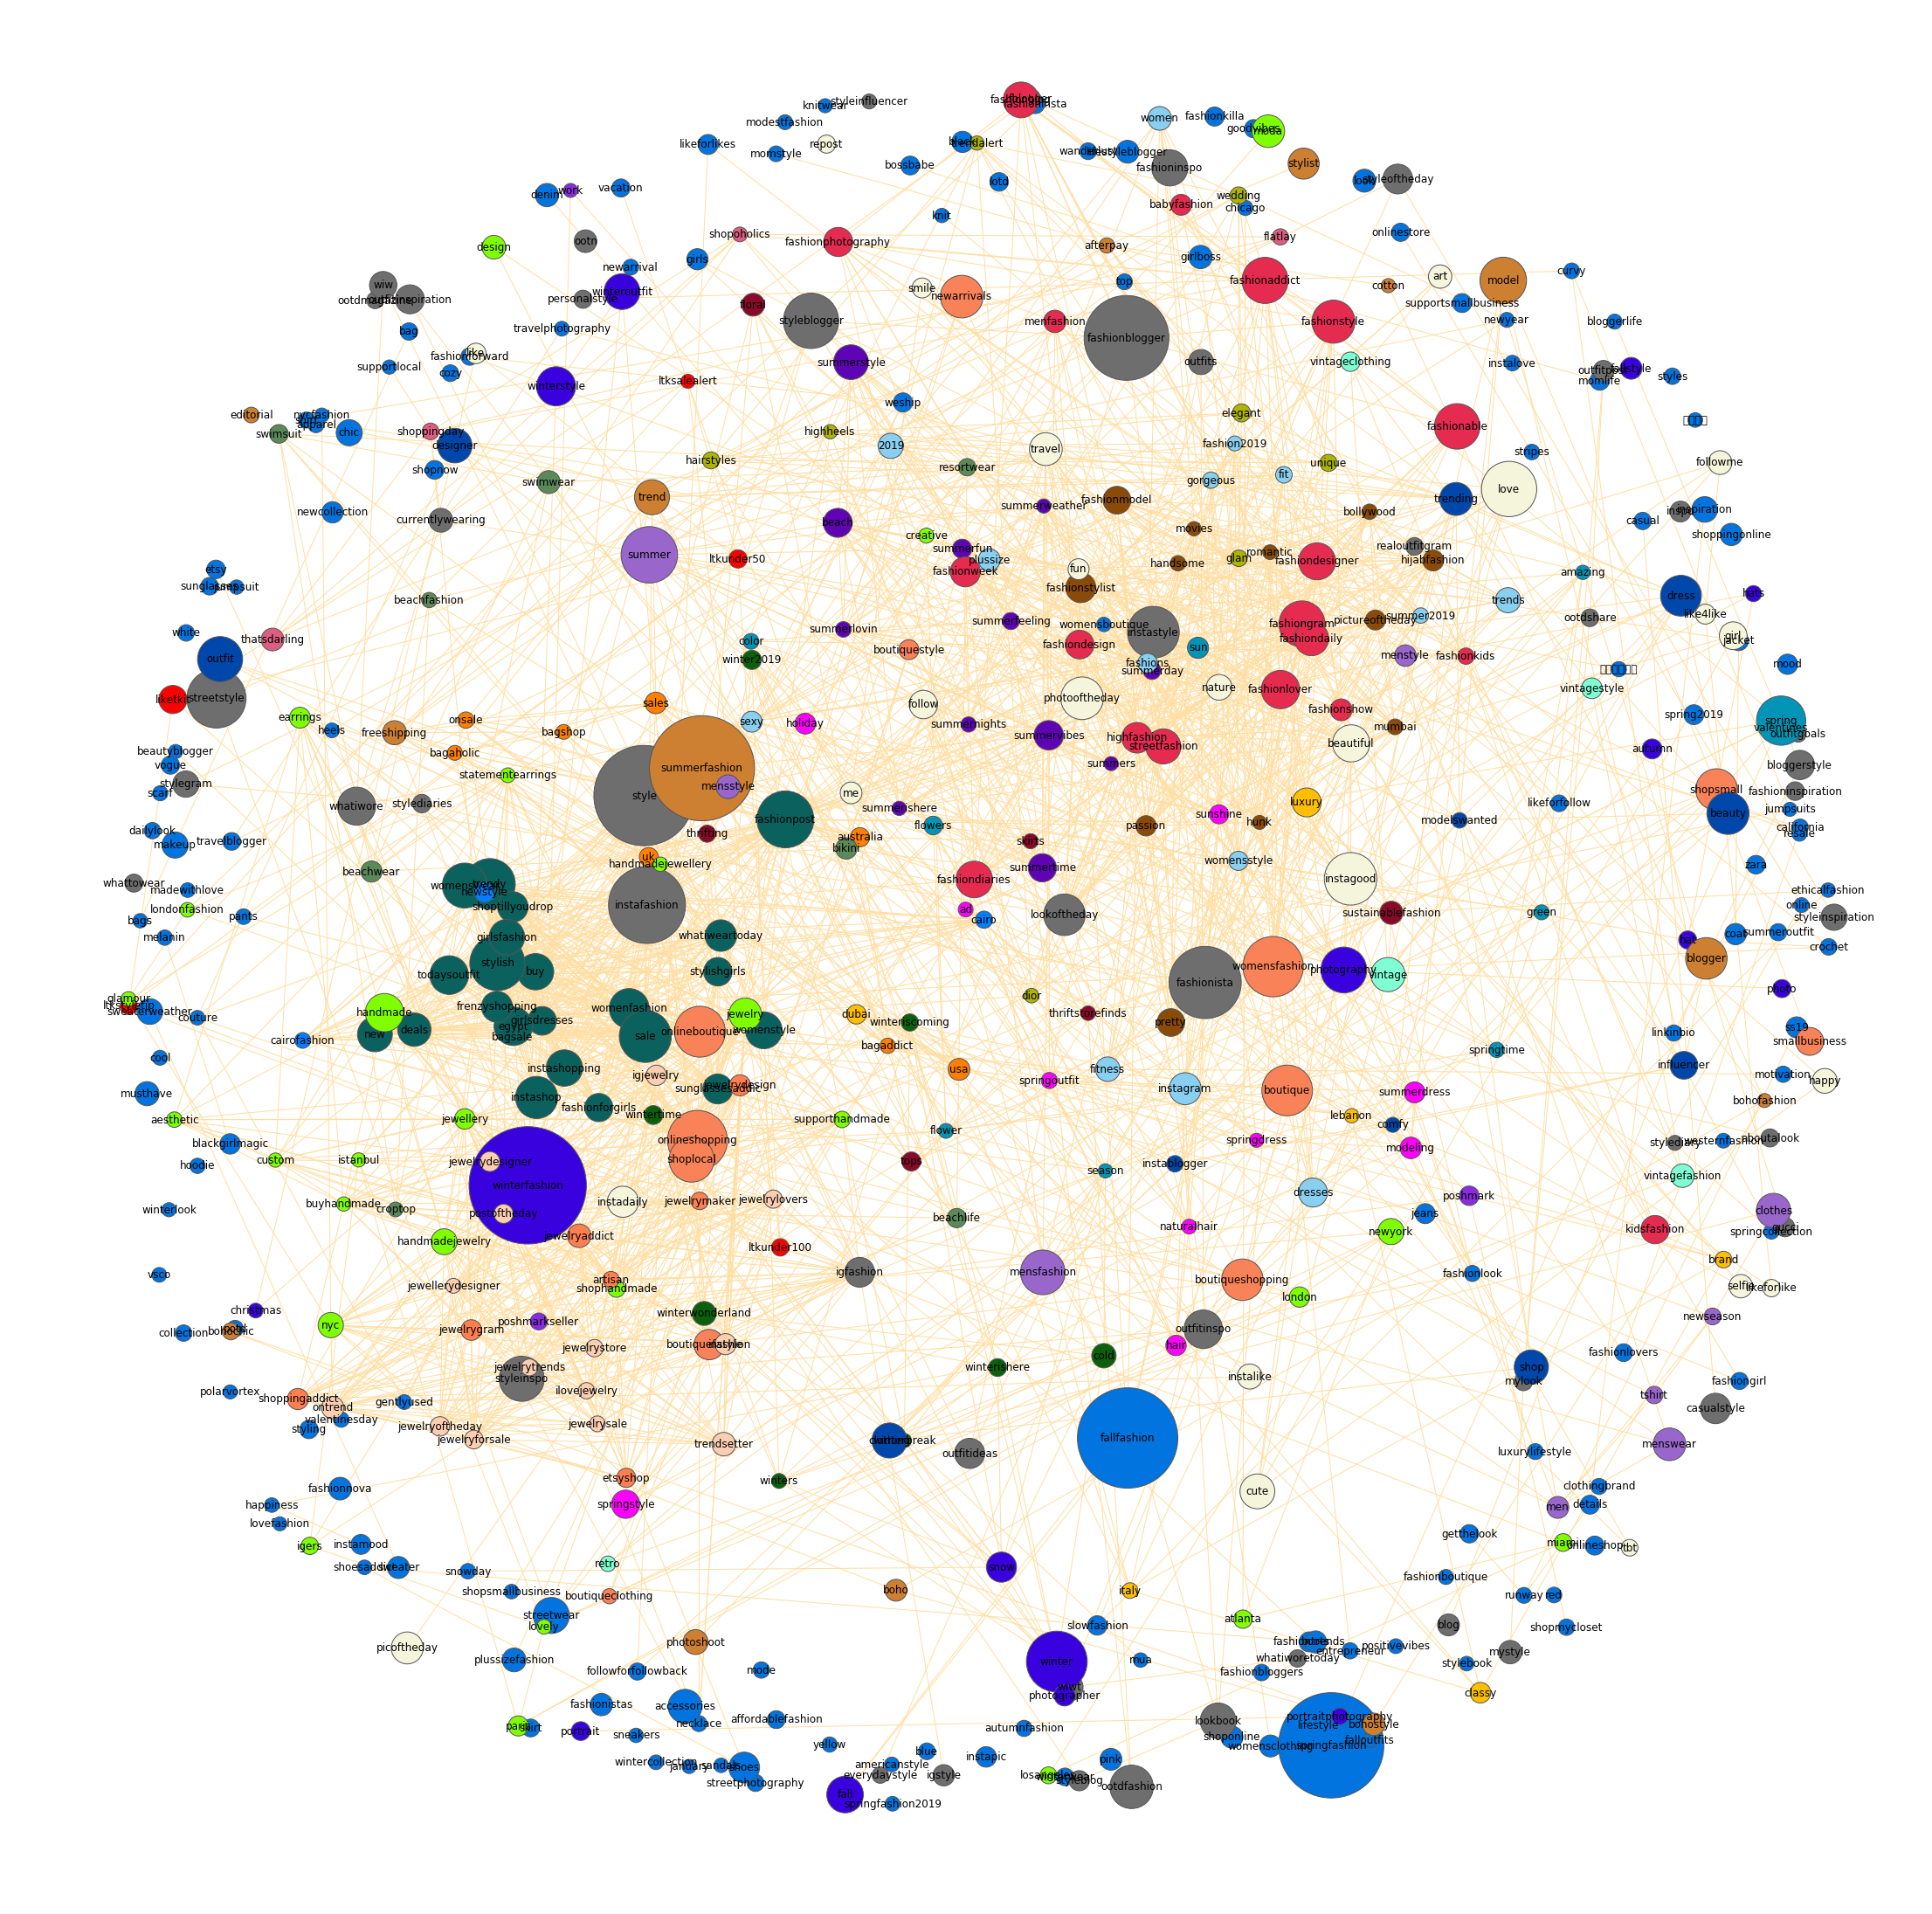

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

G = nx.Graph(day = "Stackoverflow")

for index,row in node_df200.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    
for index1,row1 in node_df200.iterrows():
    for index2,row2 in node_df200.iterrows():
        if row1['Tag'] == row2['Tag']:
            continue
        if corr_threshold200[row1['Tag']][row2['Tag']] > 0.35:
            G.add_edge(row1['Tag'],row2['Tag'],weight = corr_threshold200[row1['Tag']][row2['Tag']])


# corr_affinity 값이 높은 노드들만 엣지를 연결한다. 1개 ~ 5개 까지 조절 가능
# i = 0
# for index1,row1 in node_df.iterrows():
#     for j in range(5):
#         try:
#             G.add_edge(row1['Tag'],max_values[i][j],weight = corr_affinity[row1['Tag']][max_values[i][j]]*5 )
#         except:
#             pass
# #             print('tag : ' + row1['Tag'] + ' i,j ' + str(i) + ' '+ str(j))
#     i += 1

color_map = {1:'#FF0000', 2:'#FF8000', 3:'#AEB404', 4:'#80FF00', 5:'#0B610B', 6:'#0B615E',  
             7:'#6E6E6E', 0:'#0174DF', 8:'#3A01DF', 9:'#5F04B4', 10:'#FF00FF', 11:'#8A0829',
            12:'#8A4B08',13: '#FA8258' ,14:'#5B895A', 15:'#FBCEB1', 16:'#7FFFD4', 17:'#007FFF', 18:'#89CFF0', 19:'#CD7F32',
             20:'#E52B50', 21:'#FFBF00', 22:'#9966CC', 23:'#F5F5DC', 24:'#0095B6', 25:'#8A2BE2', 26:'#DE5D83', 27:'#7FFF00', 28:'#0047AB',
             29:'#FF7F50', 30:'#00FFFF', 31:'#808080', 32:'#29AB87', 33:'#FFF700', 34:'#FF00FF', 35:'#E0B0FF', 36:'#808000', 37:'#CCCCFF',
            38:'#FD6C9E', 39:'#CC8899', 40:'#D2B48C', 41:'#ffff99', 42:'#cca300', 43:'#cc0066', 44:'#b3ecff', 45:'#0000e6',
            46:'#8080ff',47:'#e6b3ff',48:'#7700b3',49:'#990000',50:'#00cca3'}
plt.figure(figsize = (30,30))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*3 for node in G]

nx.draw(G, node_color=colors, node_size=sizes,
        pos=nx.spring_layout(G, k=0.5, iterations=50), **options)

ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
fig = plt.gcf()
plt.show()
fig.savefig('09_500tag_30cluster_fashion_style_ootd_shopping')

# Silhouette scoring

In [34]:
from sklearn import metrics

In [35]:
X = np.array(corr_threshold200)
score = metrics.silhouette_score(X, labels, metric='euclidean')

In [36]:
# 500tag 30cluster remove tag: fashion,style,ootd,shopping
print(round(score,4))

0.1515
